In [3]:
import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [4]:
from scripts.load_data import load_data_from_postgres, load_data_using_sqlalchemy
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

c:\Users\AII\Desktop\telecommunication-data-analysis\scripts\load_data.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Successfully loaded the data


In [5]:
# Display data types and non-null counts
df.info()

# Display the first few rows of the dataset to understand its structure
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
telecom_data = df.copy()
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
from src.utils import missing_values_table, convert_columns_to_mb,apply_ms_to_sec_and_drop
missing_values_df = missing_values_table(telecom_data)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [8]:
transformed_telecom_data = telecom_data.copy()
# Example usage
columns_to_convert = ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                      'Activity Duration DL (ms)', 'Activity Duration UL (ms)']

apply_ms_to_sec_and_drop(columns_to_convert, transformed_telecom_data)


,Bearer Id,Start,End,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start sec,End sec,Dur. (sec),Avg RTT DL (sec),Avg RTT UL (sec),Activity Duration DL (sec),Activity Duration UL (sec)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,23.0,44.0,NaN,...,8.814393e+06,36749741.0,308879636.0,0.770,0.662,1823.652,0.042,0.005,37.624,38.787
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,16.0,26.0,NaN,...,1.505514e+07,53800391.0,653384965.0,0.235,0.606,1365.104,0.065,0.005,0.168,3.560
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,6.0,9.0,NaN,...,4.215763e+06,27883638.0,279807335.0,0.001,0.652,1361.762,NaN,NaN,0.000,0.000
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,44.0,44.0,NaN,...,1.279728e+07,43324218.0,846028530.0,0.486,0.171,1321.509,NaN,NaN,3.330,37.882
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,6.0,9.0,NaN,...,1.391032e+07,38542814.0,569138589.0,0.565,0.954,1089.009,NaN,NaN,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,4/30/2019 6:02,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,52.0,65.0,NaN,...,1.348742e+07,57628851.0,574175259.0,0.451,0.214,81.230,0.032,0.000,42.376,41.915
149997,7.349883e+18,4/29/2019 7:28,4/30/2019 10:41,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,23.0,54.0,NaN,...,2.457758e+06,39135081.0,666648844.0,0.483,0.187,97.970,0.027,0.002,17.264,16.759
149998,1.311448e+19,4/29/2019 7:28,4/30/2019 10:46,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,47.0,NaN,...,1.131473e+07,34912224.0,592786405.0,0.283,0.810,98.249,0.043,0.006,25.003,28.640
149999,1.311448e+19,4/29/2019 7:28,4/30/2019 10:40,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,34.0,37.0,NaN,...,1.406930e+06,29626096.0,371895920.0,0.696,0.327,97.910,0.037,0.005,13.405,34.088


In [9]:

# List of columns to convert from Bytes to MB
columns_to_convert = [
    'HTTP UL (Bytes)', 'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)', 'HTTP DL (Bytes)',
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
    'Gaming DL (Bytes)', 'Total DL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)'
]

# Apply the function to convert all columns
convert_columns_to_mb(columns_to_convert, transformed_telecom_data)


,Bearer Id,Start,End,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),...,Youtube DL (MB),Netflix DL (MB),Gaming DL (MB),Total DL (MB),TCP DL Retrans. Vol (MB),TCP UL Retrans. Vol (MB),Other DL (MB),Other UL (MB),Email DL (MB),Email UL (MB)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,23.0,44.0,100.0,...,15.854611,8.198936,278.082303,308.879636,NaN,NaN,171.744450,8.814393,3.563542,0.137762
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,16.0,26.0,100.0,...,20.247395,18.338413,608.750074,653.384965,NaN,NaN,526.904238,15.055145,0.629046,0.308339
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,6.0,9.0,100.0,...,19.725661,17.587794,229.584621,279.807335,NaN,NaN,410.692588,4.215763,2.690151,0.672973
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,44.0,44.0,100.0,...,21.388122,13.994646,799.538153,846.028530,NaN,NaN,749.039933,12.797283,1.439754,0.631229
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,6.0,9.0,100.0,...,15.259380,17.124581,527.707248,569.138589,NaN,NaN,550.709500,13.910322,1.936496,0.173853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,4/30/2019 6:02,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,52.0,65.0,100.0,...,16.191667,17.883703,526.609673,574.175259,NaN,NaN,3.264510,13.487416,0.057639,0.633237
149997,7.349883e+18,4/29/2019 7:28,4/30/2019 10:41,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,23.0,54.0,100.0,...,13.877234,19.350146,626.893062,666.648844,NaN,NaN,712.180387,2.457758,1.954414,0.167304
149998,1.311448e+19,4/29/2019 7:28,4/30/2019 10:46,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,47.0,100.0,...,22.660510,9.963942,553.539484,592.786405,NaN,NaN,121.100856,11.314729,1.525734,0.532543
149999,1.311448e+19,4/29/2019 7:28,4/30/2019 10:40,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,34.0,37.0,100.0,...,8.817106,3.322253,352.536971,371.895920,NaN,NaN,814.713113,1.406930,2.228270,0.622644


**User Overview analysis**

In [10]:
# Group by handset and count the number of occurrences
top_handsets = transformed_telecom_data['Handset Type'].value_counts().head(10)
print(top_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [11]:
# Group by manufacturer and count occurrences
top_manufacturers = transformed_telecom_data['Handset Manufacturer'].value_counts().head(3)
print(top_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [12]:
# Filter for top manufacturers and get top 5 handsets for each
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer = transformed_telecom_data[transformed_telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top handsets for {manufacturer}:")
    print(top_handsets_per_manufacturer)

Top handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


**User Behavior Analysis via Applications**

    Application  Total Data Usage (MB)
0  Social Media           2.742394e+05
1       Youtube           3.396545e+06
2       Netflix           3.394314e+06
3        Google           1.171102e+06
4         Email           3.388676e+05
5        Gaming           6.455040e+07
6         Other           6.440523e+07


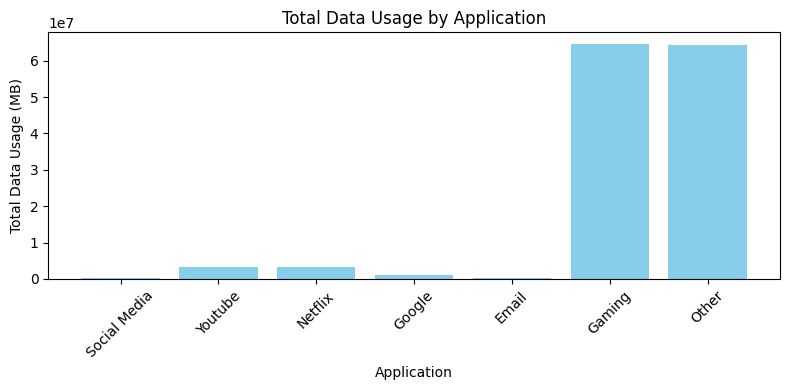

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the applications to calculate total data usage (DL + UL)
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Loop through each application and calculate the total data usage (DL + UL)
for app in applications:
    transformed_telecom_data[f'{app} Total'] = transformed_telecom_data[f'{app} DL (MB)'] + transformed_telecom_data[f'{app} UL (MB)']

# Create a dictionary to summarize total data usage for each application
total_usage = {app: transformed_telecom_data[f'{app} Total'].sum() for app in applications}

# Convert the dictionary into a DataFrame for visualization
total_usage_transformed_telecom_data = pd.DataFrame(list(total_usage.items()), columns=['Application', 'Total Data Usage (MB)'])

# Display the DataFrame
print(total_usage_transformed_telecom_data)


# Plot the total data usage for each application
plt.figure(figsize=(8, 4))
plt.bar(total_usage_transformed_telecom_data['Application'], total_usage_transformed_telecom_data['Total Data Usage (MB)'], color='skyblue')
plt.title('Total Data Usage by Application')
plt.xlabel('Application')
plt.ylabel('Total Data Usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Step 1: Add a column for total data volume (DL + UL) per application for each session
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    transformed_telecom_data[f'{app} Total'] = transformed_telecom_data[f'{app} DL (MB)'] + transformed_telecom_data[f'{app} UL (MB)']

# Step 2: Aggregate the data per user (IMSI)
user_behavior = transformed_telecom_data.groupby('IMSI').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),               # Assuming 'Bearer Id' is session identifier
    total_session_duration=('Dur. (sec)', 'sum'),                # Sum of session durations
    total_social_media_data=('Social Media Total', 'sum'),       # Total data volume for Social Media
    total_youtube_data=('Youtube Total', 'sum'),                 # Total data volume for YouTube
    total_netflix_data=('Netflix Total', 'sum'),                 # Total data volume for Netflix
    total_google_data=('Google Total', 'sum'),                   # Total data volume for Google
    total_email_data=('Email Total', 'sum'),                     # Total data volume for Email
    total_gaming_data=('Gaming Total', 'sum'),                   # Total data volume for Gaming
    total_other_data=('Other Total', 'sum')                      # Total data volume for Other
)

# Step 3: Calculate total download and upload data per user
# Download data
user_behavior['total_download_data'] = transformed_telecom_data.groupby('IMSI')[[
    'Social Media DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)',
    'Google DL (MB)', 'Email DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)'
]].sum().sum(axis=1)

# Upload data
user_behavior['total_upload_data'] = transformed_telecom_data.groupby('IMSI')[[
    'Social Media UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)',
    'Google UL (MB)', 'Email UL (MB)', 'Gaming UL (MB)', 'Other UL (MB)'
]].sum().sum(axis=1)

# Step 4: Display the aggregated user behavior data
user_behavior.head()


,number_of_xdr_sessions,total_session_duration,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data,total_download_data,total_upload_data
IMSI,,,,,,,,,,,
2.040471e+14,1,869.844,1.546088,40.940710,28.846230,9.218647,3.330974,43.070260,401.360457,467.857317,60.456049
2.040808e+14,1,877.385,0.715224,11.959905,26.592300,10.438660,1.520771,178.048738,470.526473,662.506156,37.295915
2.082001e+14,1,86.019,3.122781,19.882439,31.830562,1.624662,3.657501,9.124516,515.973704,531.421507,53.794658
2.082001e+14,1,86.254,2.577104,25.657632,27.785852,13.811478,3.855734,344.105897,309.610741,693.821166,33.583272
2.082001e+14,2,573.923,3.426716,13.840201,57.343415,11.665887,5.564462,917.684766,1079.435419,2017.635862,71.325004


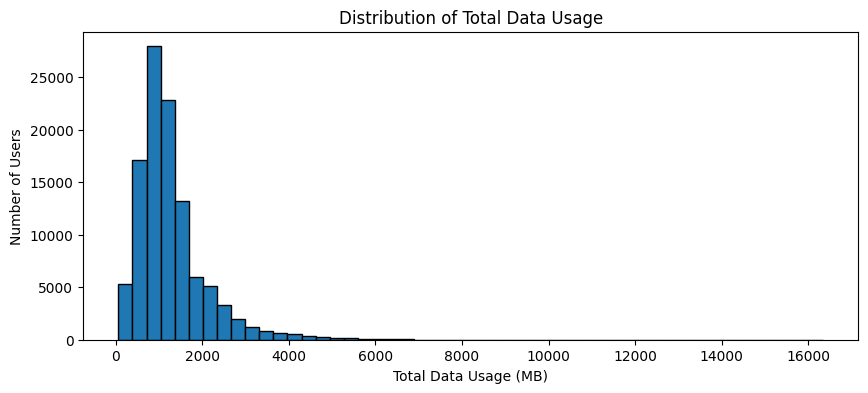

<Figure size 500x800 with 0 Axes>

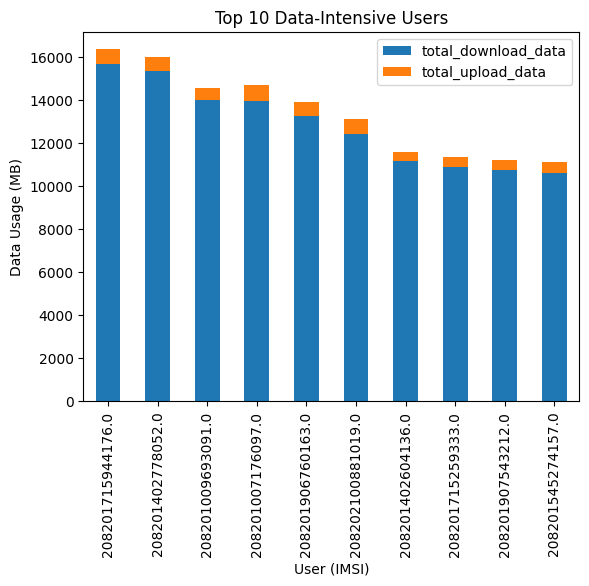

In [15]:
# Plot histogram of total data usage
plt.figure(figsize=(10, 4))
plt.hist(user_behavior['total_download_data'] + user_behavior['total_upload_data'], bins=50, edgecolor='k')
plt.xlabel('Total Data Usage (MB)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Data Usage')
plt.show()

top_users = user_behavior.sort_values(by='total_download_data', ascending=False).head(10)
plt.figure(figsize=(5, 8))
top_users[['total_download_data', 'total_upload_data']].plot(kind='bar', stacked=True)
plt.xlabel('User (IMSI)')
plt.ylabel('Data Usage (MB)')
plt.title('Top 10 Data-Intensive Users')
plt.show()


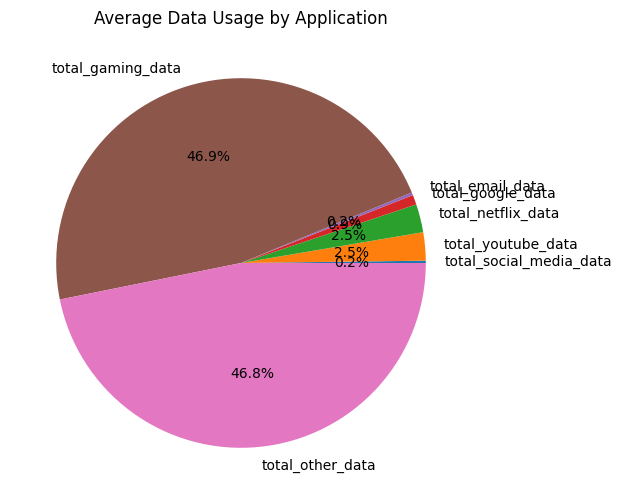

In [16]:
# Calculate average data usage by application
avg_data_by_app = user_behavior[['total_social_media_data', 'total_youtube_data', 'total_netflix_data',
                                 'total_google_data', 'total_email_data', 'total_gaming_data', 'total_other_data']].mean()

plt.figure(figsize=(10, 6))
avg_data_by_app.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Data Usage by Application')
plt.ylabel('')  # Hide y-label
plt.show()

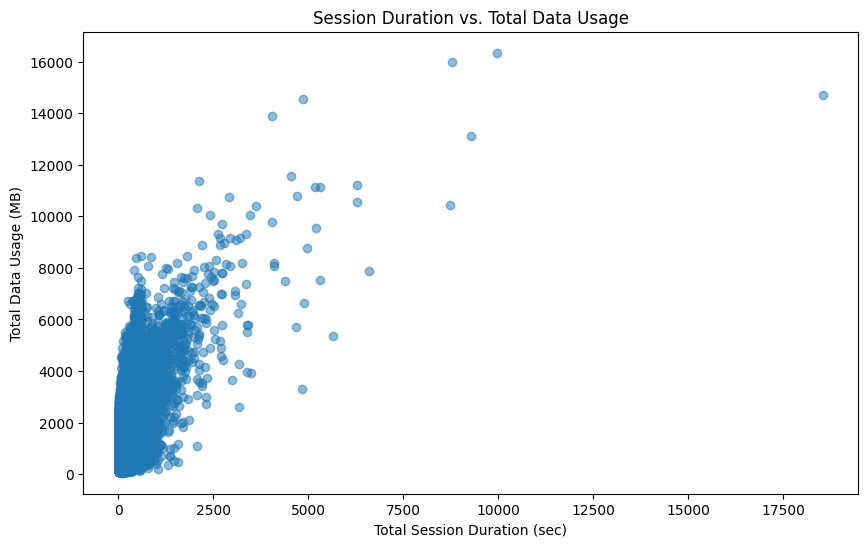

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(user_behavior['total_session_duration'], 
            user_behavior['total_download_data'] + user_behavior['total_upload_data'], alpha=0.5)
plt.xlabel('Total Session Duration (sec)')
plt.ylabel('Total Data Usage (MB)')
plt.title('Session Duration vs. Total Data Usage')
plt.show()


In [17]:
# Compute total session duration
user_behavior['total_duration'] = user_behavior['total_session_duration']

# Segment into deciles
user_behavior['decile'] = pd.qcut(user_behavior['total_duration'], 10, labels=False) + 1

# Compute total data per decile class
data_per_decile = user_behavior.groupby('decile').agg({
    'total_download_data': 'sum',
    'total_upload_data': 'sum'
})
data_per_decile

,total_download_data,total_upload_data
decile,,
1,9.637180e+06,4.507508e+05
2,1.071996e+07,5.058663e+05
3,1.156422e+07,5.451664e+05
4,1.094794e+07,5.120978e+05
5,9.001365e+06,4.209930e+05
6,1.142922e+07,5.354669e+05
7,1.085017e+07,5.075130e+05
8,1.385108e+07,6.539729e+05
9,1.648715e+07,7.728156e+05


In [50]:
# Compute summary statistics
summary_stats = user_behavior[['total_download_data', 'total_upload_data', 'total_session_duration']].describe()
summary_stats

,total_download_data,total_upload_data,total_session_duration
count,107265.000000,107265.000000,107265.000000
mean,1220.061004,57.284993,145.935549
std,810.947538,35.642660,186.351794
min,27.297842,2.866892,7.142000
25%,728.908284,36.392513,70.411000
50%,1032.244571,46.780498,102.450000
75%,1454.381339,65.658420,172.799000
max,15652.041034,729.577380,18553.754000


In [51]:
# Compute variance and standard deviation
dispersion_metrics = user_behavior[['total_download_data', 'total_upload_data', 'total_session_duration']].agg(['mean', 'median', 'std', 'var'])
dispersion_metrics

,total_download_data,total_upload_data,total_session_duration
mean,1220.061004,57.284993,145.935549
median,1032.244571,46.780498,102.450000
std,810.947538,35.642660,186.351794
var,657635.909084,1270.399230,34726.991010


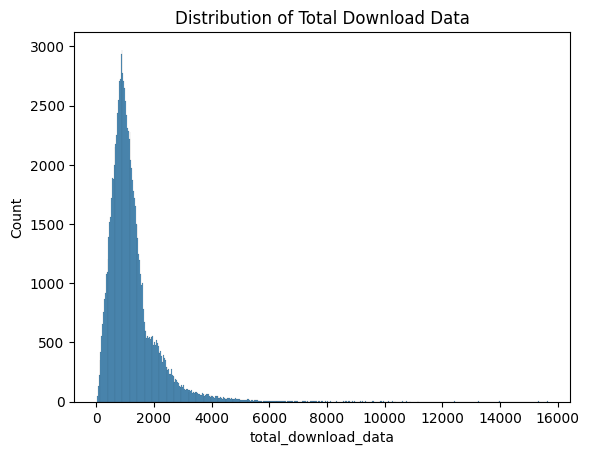

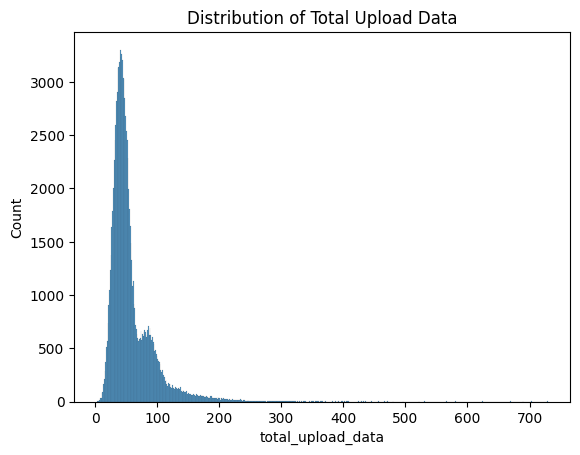

In [40]:
import seaborn as sns

# Histograms for distributions
sns.histplot(user_behavior['total_download_data'])
plt.title('Distribution of Total Download Data')
plt.show()

sns.histplot(user_behavior['total_upload_data'])
plt.title('Distribution of Total Upload Data')
plt.show()


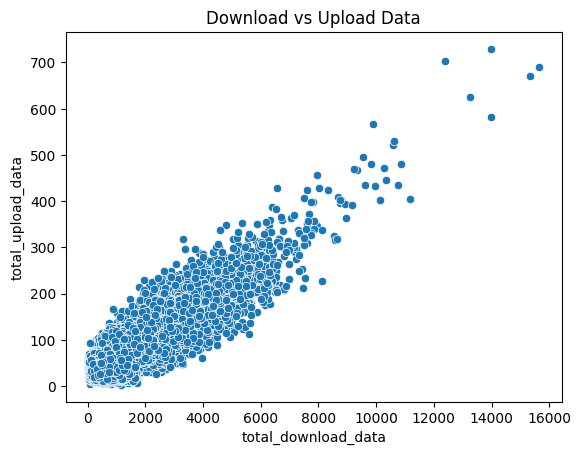

In [41]:
# Scatter plot to explore relationships
sns.scatterplot(data=user_behavior, x='total_download_data', y='total_upload_data')
plt.title('Download vs Upload Data')
plt.show()


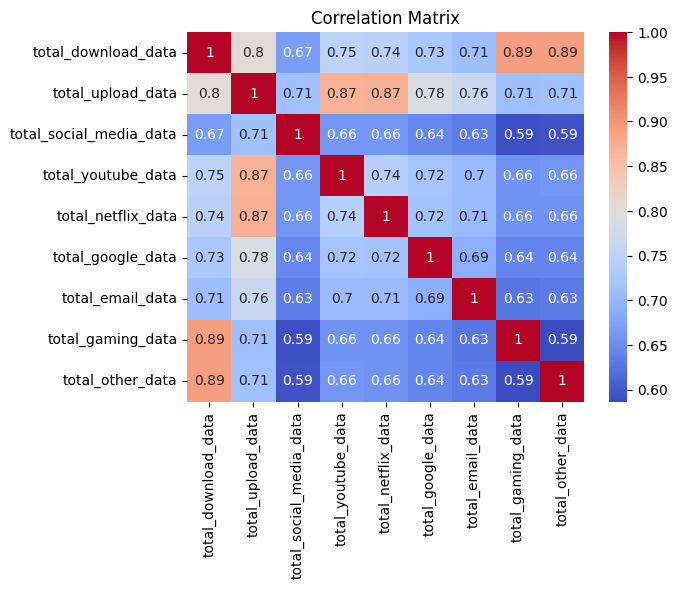

In [42]:
# Compute correlation matrix
correlation_matrix = user_behavior[['total_download_data', 'total_upload_data',
                                    'total_social_media_data', 'total_youtube_data',
                                    'total_netflix_data', 'total_google_data',
                                    'total_email_data', 'total_gaming_data',
                                    'total_other_data']].corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [52]:
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_behavior[['total_download_data', 'total_upload_data',
                                                  'total_social_media_data', 'total_youtube_data',
                                                  'total_netflix_data', 'total_google_data',
                                                  'total_email_data', 'total_gaming_data',
                                                  'total_other_data']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')


Explained Variance Ratio: [0.74076028 0.06165813]


In [53]:
pca_df

,PC1,PC2
0,-0.935340,-1.133314
1,-1.780897,-0.044242
2,-1.234917,-0.873118
3,-0.778318,-0.775338
4,1.720799,0.701745
...,...,...
107260,-1.289553,1.089291
107261,-0.387329,0.106428
107262,-1.518370,-0.135804
107263,-1.047539,1.202208


**User Engagement Analysis**

C:\Users\AII\AppData\Local\Temp\ipykernel_4412\448333091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMSI', y='session_frequency', data=top_10_users, palette='Blues_d')


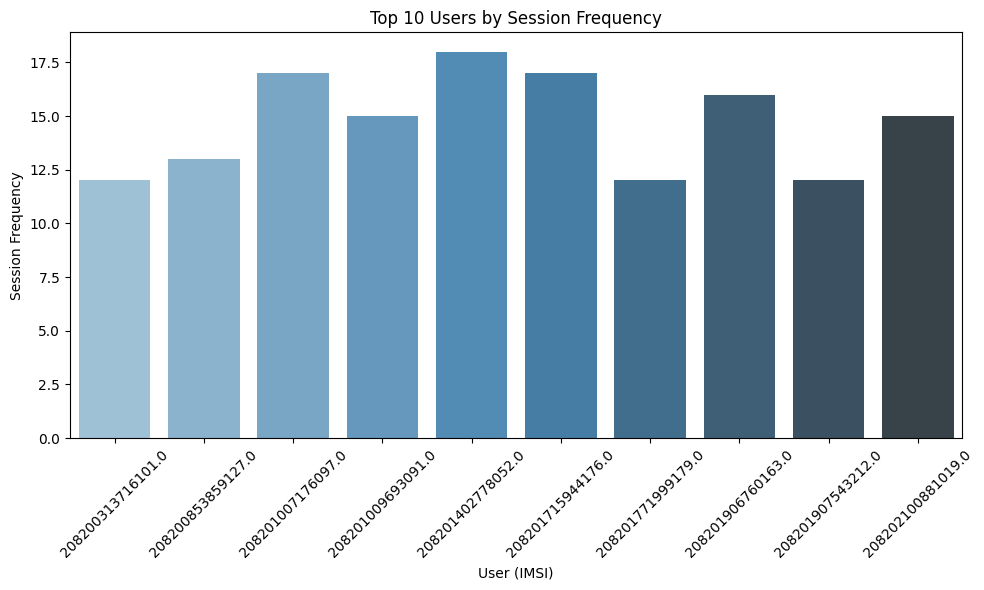

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate session frequency (number of sessions) for each user (IMSI)
user_engagement = transformed_telecom_data.groupby('IMSI').agg(
    session_frequency=('Bearer Id', 'count')  # Assuming 'Bearer Id' is the session identifier
)
# Calculate total session duration per user
user_engagement['total_session_duration'] = transformed_telecom_data.groupby('IMSI')['Dur. (sec)'].sum()
# Optionally, calculate the average session duration
user_engagement['avg_session_duration'] = transformed_telecom_data.groupby('IMSI')['Dur. (sec)'].mean()
# Calculate total traffic (download + upload)
user_engagement['total_traffic'] = user_behavior['total_download_data'] + user_behavior['total_upload_data']

# Step 2: Sort the data by session frequency and get the top 10 users
top_10_users = user_engagement.sort_values(by='session_frequency', ascending=False).head(10)

# Step 3: Plot the top 10 users based on session frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='IMSI', y='session_frequency', data=top_10_users, palette='Blues_d')
plt.title('Top 10 Users by Session Frequency')
plt.xlabel('User (IMSI)')
plt.ylabel('Session Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\AII\AppData\Local\Temp\ipykernel_4412\2256869741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMSI', y='total_session_duration', data=top_10_users, palette='Blues_d')


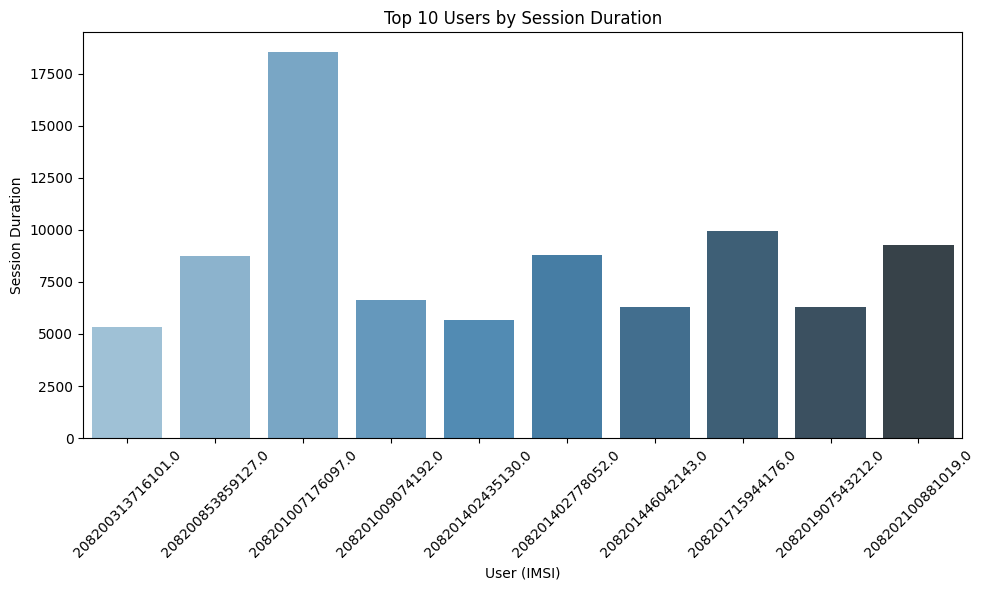

In [19]:
# Step 2: Sort the data by session frequency and get the top 10 users
top_10_users = user_engagement.sort_values(by='total_session_duration', ascending=False).head(10)

# Step 3: Plot the top 10 users based on session frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='IMSI', y='total_session_duration', data=top_10_users, palette='Blues_d')
plt.title('Top 10 Users by Session Duration')
plt.xlabel('User (IMSI)')
plt.ylabel('Session Duration')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [60]:
user_engagement

,session_frequency,total_session_duration,avg_session_duration,total_traffic
IMSI,,,,
2.040471e+14,1,869.844,869.8440,528.313366
2.040808e+14,1,877.385,877.3850,699.802071
2.082001e+14,1,86.019,86.0190,585.216165
2.082001e+14,1,86.254,86.2540,727.404438
2.082001e+14,2,573.923,286.9615,2088.960866
...,...,...,...,...
2.082099e+14,1,127.367,127.3670,1303.537756
2.082099e+14,1,168.543,168.5430,1239.637423
2.082099e+14,1,86.399,86.3990,786.333684


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the metrics
scaler = MinMaxScaler()
user_engagement[['session_frequency', 'total_session_duration', 'total_traffic']] = scaler.fit_transform(
    user_engagement[['session_frequency', 'total_session_duration', 'total_traffic']]
)

# Create an engagement score (weighted sum of metrics)
user_engagement['engagement_score'] = (
    0.4 * user_engagement['session_frequency'] +
    0.3 * user_engagement['total_session_duration'] +
    0.3 * user_engagement['total_traffic']
)


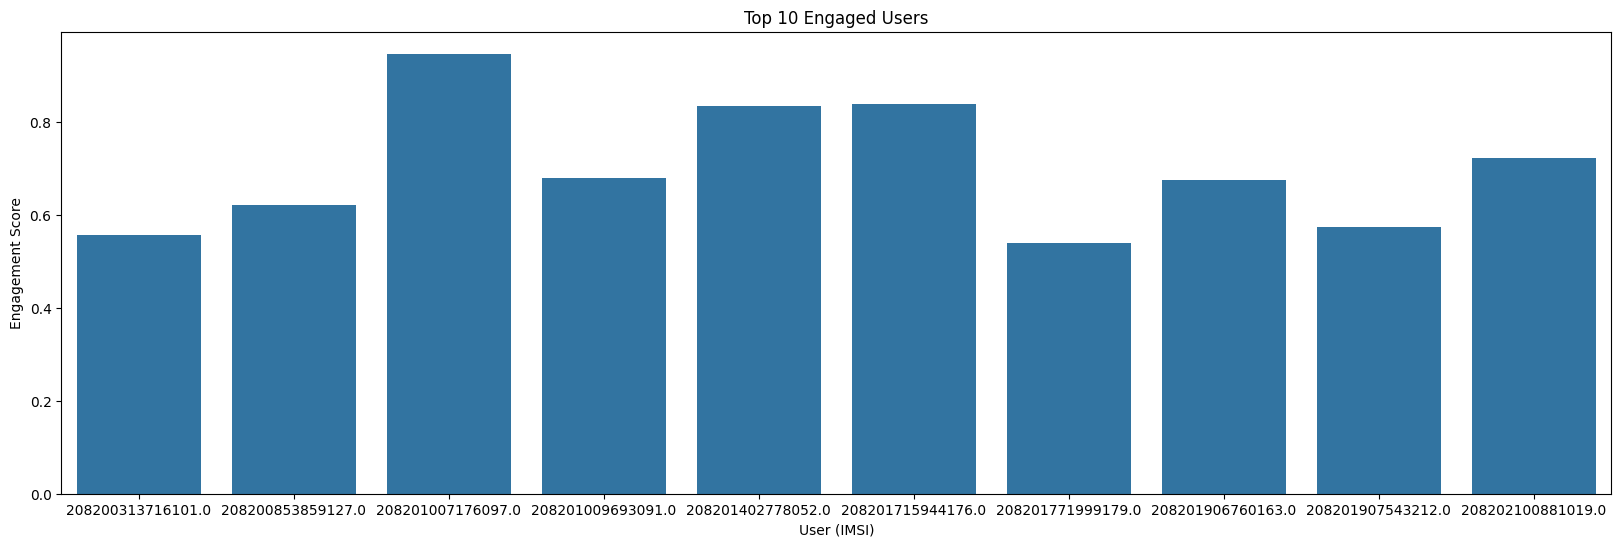

In [21]:
# Sort users by engagement score to find the most engaged users
top_engaged_users = user_engagement.sort_values(by='engagement_score', ascending=False).head(10)

# Visualize the top engaged users
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.barplot(x=top_engaged_users.index, y=top_engaged_users['engagement_score'])
plt.title('Top 10 Engaged Users')
plt.xlabel('User (IMSI)')
plt.ylabel('Engagement Score')
plt.show()


**Aggregate Metrics per Customer ID (MSISDN) and Report Top 10 Customers**

In [22]:
# Aggregate metrics per MSISDN
# Report top 10 customers per engagement metric
top_10_session_frequency = user_engagement.sort_values(by='session_frequency', ascending=False).head(10)
top_10_session_duration = user_engagement.sort_values(by='total_session_duration', ascending=False).head(10)
top_10_total_traffic = user_engagement.sort_values(by='total_traffic', ascending=False).head(10)

# Display top 10 customers for each metric
print("Top 10 Customers by Session Frequency:", top_10_session_frequency)
print("Top 10 Customers by Total Session Duration:", top_10_session_duration)
print("Top 10 Customers by Total Traffic:", top_10_total_traffic)


Top 10 Customers by Session Frequency:               session_frequency  total_session_duration  avg_session_duration  \
IMSI                                                                            
2.082014e+14           1.000000                0.473660            488.440389   
2.082010e+14           0.944444                1.000000           1091.397294   
2.082017e+14           0.944444                0.537012            586.288118   
2.082019e+14           0.888889                0.217198            252.214250   
2.082010e+14           0.833333                0.261978            324.396467   
2.082021e+14           0.833333                0.499945            618.628933   
2.082009e+14           0.722222                0.471125            672.685692   
2.082003e+14           0.666667                0.286550            443.472250   
2.082018e+14           0.666667                0.253220            391.959667   
2.082019e+14           0.666667                0.338640            523

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(user_engagement[['session_frequency', 'total_session_duration', 'total_traffic']])

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['cluster'] = kmeans.fit_predict(normalized_metrics)

# Assign the cluster labels back to the DataFrame
user_engagement['cluster'] = kmeans.labels_


In [66]:
# Compute aggregate metrics for each cluster
cluster_summary = user_engagement.groupby('cluster').agg({
    'session_frequency': ['min', 'max', 'mean', 'sum'],
    'total_session_duration': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
})

# Display cluster summary
print(cluster_summary)


        session_frequency                                   \
                      min       max      mean          sum   
cluster                                                      
0                0.000000  0.111111  0.055935  4416.055556   
1                0.111111  1.000000  0.244085   904.333333   
2                0.055556  0.222222  0.120172  2957.444444   

        total_session_duration                                 total_traffic  \
                           min       max      mean         sum           min   
cluster                                                                        
0                     0.000000  0.055811  0.005144  406.094158      0.000000   
1                     0.003206  1.000000  0.034558  128.036645      0.064534   
2                     0.000598  0.084451  0.010914  268.586694      0.018530   

                                          
              max      mean          sum  
cluster                                   
0        0.144816

In [67]:
cluster_summary

session_frequency                                   \
                      min       max      mean          sum   
cluster                                                      
0                0.000000  0.111111  0.055935  4416.055556   
1                0.111111  1.000000  0.244085   904.333333   
2                0.055556  0.222222  0.120172  2957.444444   

        total_session_duration                                 total_traffic  \
                           min       max      mean         sum           min   
cluster                                                                        
0                     0.000000  0.055811  0.005144  406.094158      0.000000   
1                     0.003206  1.000000  0.034558  128.036645      0.064534   
2                     0.000598  0.084451  0.010914  268.586694      0.018530   

                                          
              max      mean          sum  
cluster                                   
0        0.144816  0.052793  4167.995419  
1        1.000000  0.249872   925.777067  
2        0.274568  0.119312  2936.258111

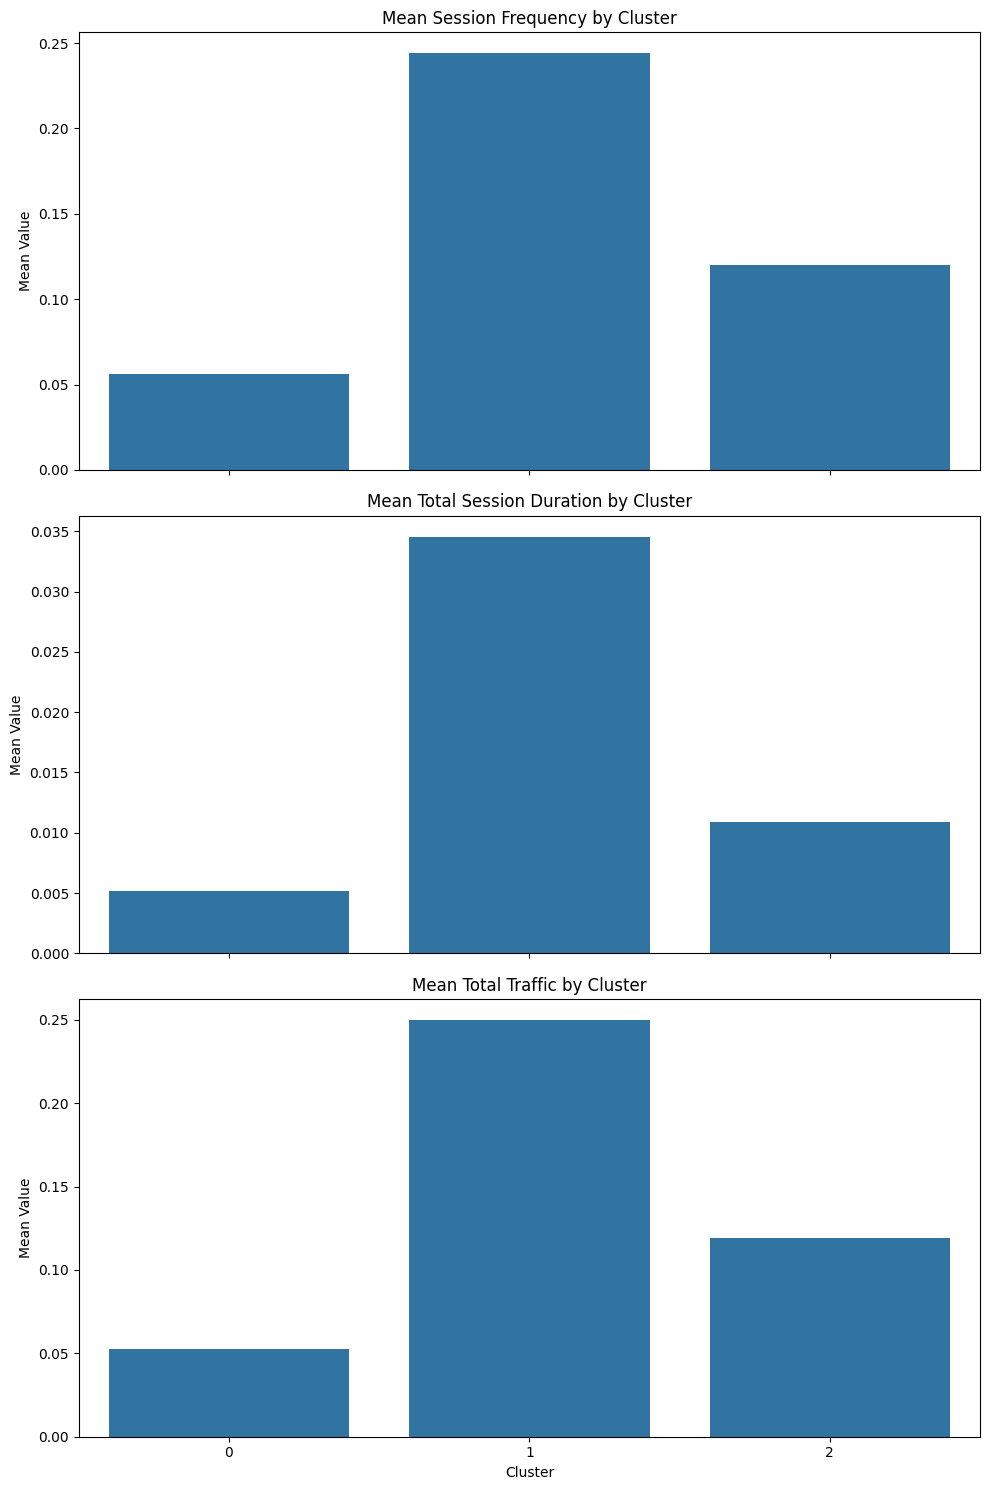

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use cluster as a column
cluster_summary_df = cluster_summary.copy().reset_index()

# Plotting the mean values for each metric across clusters
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

metrics = ['session_frequency', 'total_session_duration', 'total_traffic']

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(x='cluster', y=(metric, 'mean'), data=cluster_summary_df, ax=ax)
    ax.set_title(f'Mean {metric.replace("_", " ").title()} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')

plt.tight_layout()
plt.show()


In [80]:
cluster_summary_df

cluster session_frequency                                   \
                        min       max      mean          sum   
0       0          0.000000  0.111111  0.055935  4416.055556   
1       1          0.111111  1.000000  0.244085   904.333333   
2       2          0.055556  0.222222  0.120172  2957.444444   

  total_session_duration                                 total_traffic  \
                     min       max      mean         sum           min   
0               0.000000  0.055811  0.005144  406.094158      0.000000   
1               0.003206  1.000000  0.034558  128.036645      0.064534   
2               0.000598  0.084451  0.010914  268.586694      0.018530   

                                    
        max      mean          sum  
0  0.144816  0.052793  4167.995419  
1  1.000000  0.249872   925.777067  
2  0.274568  0.119312  2936.258111

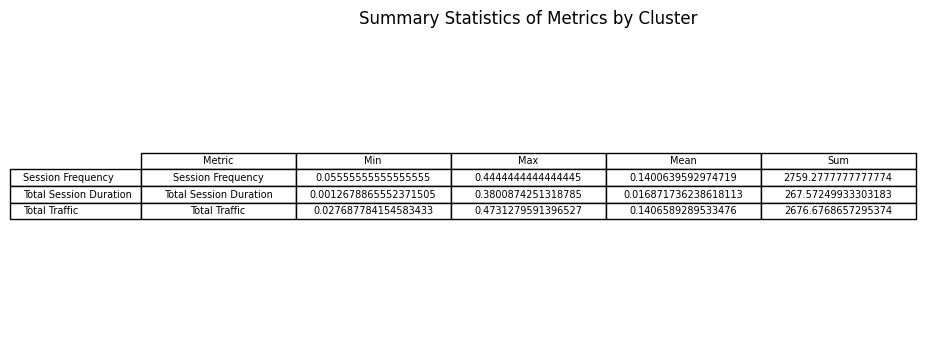

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for the summary statistics table
summary_df = pd.DataFrame({
    'Metric': ['Session Frequency', 'Total Session Duration', 'Total Traffic'],
    'Min': [cluster_summary[('session_frequency', 'min')].mean(), 
            cluster_summary[('total_session_duration', 'min')].mean(), 
            cluster_summary[('total_traffic', 'min')].mean()],
    'Max': [cluster_summary[('session_frequency', 'max')].mean(), 
            cluster_summary[('total_session_duration', 'max')].mean(), 
            cluster_summary[('total_traffic', 'max')].mean()],
    'Mean': [cluster_summary[('session_frequency', 'mean')].mean(), 
             cluster_summary[('total_session_duration', 'mean')].mean(), 
             cluster_summary[('total_traffic', 'mean')].mean()],
    'Sum': [cluster_summary[('session_frequency', 'sum')].mean(), 
            cluster_summary[('total_session_duration', 'sum')].mean(), 
            cluster_summary[('total_traffic', 'sum')].mean()]
})

# Plotting table
fig, ax = plt.subplots(figsize=(10, 4)) # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df['Metric'],
                 cellLoc='center', 
                 loc='center')
plt.title('Summary Statistics of Metrics by Cluster')
plt.show()


**Aggregate User Total Traffic per Application and Derive Top 10 Most Engaged Users per Application**

In [86]:
# List of application columns for UL and DL traffic
applications_ul = ['Social Media UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)',
                   'Google UL (Bytes)', 'Email UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

applications_dl = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
                   'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Create total traffic for each application by summing UL and DL
for app_ul, app_dl in zip(applications_ul, applications_dl):
    app_name = app_ul.split()[0]  # Extracts app name like 'Social Media'
    user_engagement[f'{app_name.lower()}_total_traffic'] = telecom_data.groupby('IMSI')[app_ul].sum() + telecom_data.groupby('IMSI')[app_dl].sum()

# Derive the top 10 most engaged users per application
top_10_per_app = {}
for app_ul in applications_ul:
    app_name = app_ul.split()[0]  # Get the app name
    top_10_per_app[app_name] = user_engagement.sort_values(by=f'{app_name.lower()}_total_traffic', ascending=False).head(10)

# Display the top 10 users for each application
for app, top_users in top_10_per_app.items():
    print(f"Top 10 users for {app}:")
    print(top_users)
    print("\n")

Top 10 users for Social:
              session_frequency  total_session_duration  avg_session_duration  \
IMSI                                                                            
2.082014e+14           1.000000                0.473660            488.440389   
2.082021e+14           0.833333                0.499945            618.628933   
2.082019e+14           0.888889                0.217198            252.214250   
2.082017e+14           0.944444                0.537012            586.288118   
2.082010e+14           0.944444                1.000000           1091.397294   
2.082009e+14           0.722222                0.471125            672.685692   
2.082017e+14           0.666667                0.218504            338.304333   
2.082018e+14           0.611111                0.032548             55.527364   
2.082019e+14           0.666667                0.338640            523.980083   
2.082019e+14           0.500000                0.164701            340.197667   

  

**Plot the Top 3 Most Used Applications**

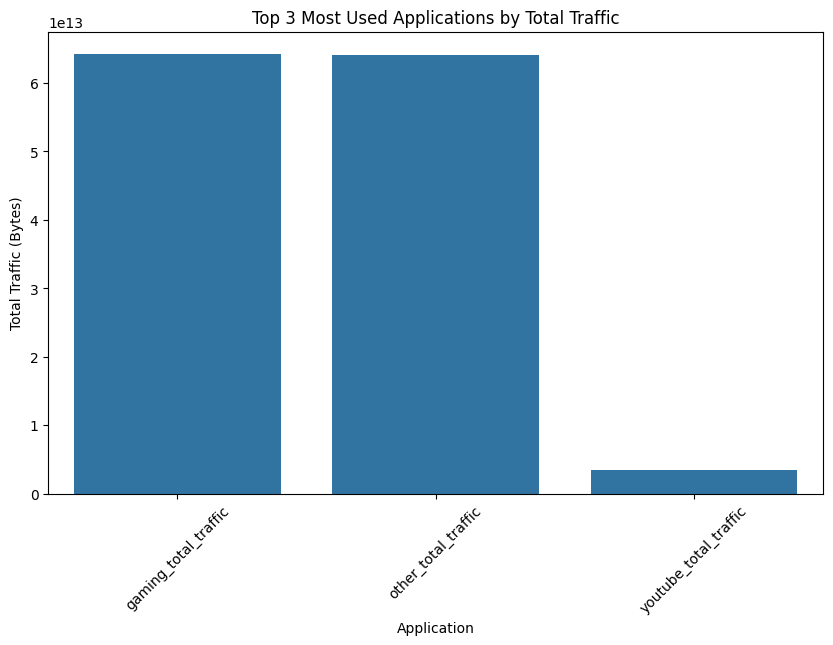

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of updated traffic columns
traffic_columns = [f'{app.split()[0].lower()}_total_traffic' for app in applications_ul]

# Compute total traffic per application
application_totals = user_engagement[traffic_columns].sum()

# Sort and get top 3 most used applications
top_3_apps = application_totals.sort_values(ascending=False).head(3)

# Plot the top 3 most used applications
plt.figure(figsize=(10,6))
sns.barplot(x=top_3_apps.index, y=top_3_apps.values)
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')  # Ensure the unit is accurate
plt.xticks(rotation=45)
plt.show()


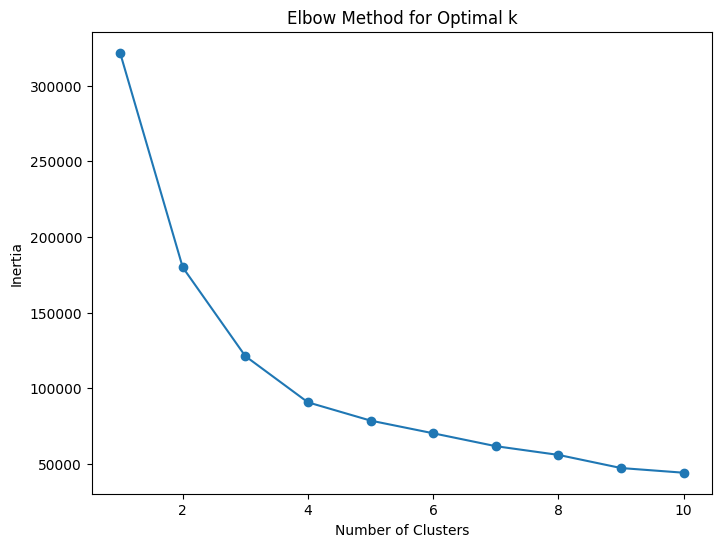

In [88]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test different values of k using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [90]:
# After identifying the optimal k (e.g., k=4), run k-means
optimal_k = 4  # Replace with the value you find from the elbow method
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
user_engagement['cluster_optimal'] = kmeans_optimal.fit_predict(normalized_metrics)

# Display the distribution of users across the clusters
print(user_engagement['cluster_optimal'].value_counts())


cluster_optimal
0    78523
3    23241
2     5280
1      221
Name: count, dtype: int64
